In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_text = pd.read_parquet("../data/processed/20240127_sotu/text.parquet")
df_text

,year,author_id,author,title,text_id,text,text_length
0,1790,0,George Washington,Second State of the Union Address,0,Fellow-Citizens of the Senate and the House of...,8359
1,1791,0,George Washington,Third State of the Union Address,1,Fellow-Citizens of the Senate and the House of...,13833
2,1792,0,George Washington,Fourth State of the Union Address,2,Fellow-Citizens of the Senate and of the House...,12658
3,1793,0,George Washington,Fifth State of the Union Address,3,Fellow Citizens of the Senate and of the House...,11598
4,1794,0,George Washington,Sixth State of the Union Address,4,Fellow Citizens of the Senate and of the House...,17519
...,...,...,...,...,...,...,...
232,2019,43,Donald Trump,Donald Trump's Third State of the Union Address,232,"Madam Speaker, Mr. Vice President, Members of ...",30716
233,2020,43,Donald Trump,Donald Trump's Fourth State of the Union Address,233,"Madam Speaker, Mr. Vice President, Members of ...",35389
234,2021,44,Joe Biden,Joe Biden's First State of the Union Address,234,Thank you. Thank you. Thank you. Good to be...,46680
235,2022,44,Joe Biden,Joe Biden's Second State of the Union Address,235,"Madam Speaker, Madam Vice President, and our F...",44902


In [3]:
# nearest tfidf to paragraph id 23103
(pd.read_csv("../data/processed/20240127_sotu/tfidf.csv")
 .merge(df_text[["text_id", "author", "year"]], on="text_id")
)

,id,text_id,paragraph_index,paragraph_text,paragraph_length,paragraph_id,author,year
0,23103,236,429,We must be the nation we have always been at o...,92,23103,Joe Biden,2023
1,15123,168,80,We must be forward-looking in our research and...,122,15123,Dwight D. Eisenhower,1958
2,12607,150,19,We must always be wary of those who with sound...,110,12607,Franklin Delano Roosevelt,1941
3,19337,204,43,That requires a forward-looking plan of action...,170,19337,George H. W. Bush,1991
4,19814,209,102,Our country is and always has been a great and...,111,19814,Bill Clinton,1996
5,23012,236,338,"Together, we did what America always does at o...",54,23012,Joe Biden,2023
6,17456,187,82,As we move forward to meet our global challeng...,105,17456,Gerald Ford,1975
7,14902,166,75,"In this time of testing in agriculture, we sho...",222,14902,Dwight D. Eisenhower,1956
8,13843,158,3,"In this society, we are conservative about the...",514,13843,Harry S. Truman,1949
9,21960,231,133,That is what our country has always been about...,130,21960,Donald Trump,2018


In [4]:
# nearest ada-002 to paragraph id 23103
(pd.read_csv("../data/processed/20240127_sotu/openai-ada-002.csv")
 .merge(df_text[["text_id", "author", "year"]], on="text_id")
)

,id,text_id,paragraph_index,paragraph_text,paragraph_length,paragraph_id,author,year
0,23103,236,429,We must be the nation we have always been at o...,92,23103,Joe Biden,2023
1,19320,204,26,We are a nation of rock-solid realism and clea...,172,19320,George H. W. Bush,1991
2,19814,209,102,Our country is and always has been a great and...,111,19814,Bill Clinton,1996
3,14824,165,125,"As we do these things, before us is a future f...",274,14824,Dwight D. Eisenhower,1955
4,21824,230,70,"From now on, America will be empowered by our ...",201,21824,Donald Trump,2017
5,21679,229,8,What was true then can be true now. Our unique...,284,21679,Barack Obama,2016
6,20156,212,10,"Now, America is working again. The promise of ...",265,20156,Bill Clinton,1999
7,23109,236,435,"As I stand here tonight, I have never been mor...",124,23109,Joe Biden,2023
8,19032,199,52,"So now, it's up to us, all of us, to prepare A...",316,19032,Ronald Reagan,1986
9,17662,190,3,"We are a great country, a strong country, a vi...",93,17662,Jimmy Carter,1978


In [5]:
# nearest 3-small to paragraph id 23103
(pd.read_csv("../data/processed/20240127_sotu/openai-3-small.csv")
 .merge(df_text[["text_id", "author", "year"]], on="text_id")
)

,id,text_id,paragraph_index,paragraph_text,paragraph_length,paragraph_id,author,year
0,23103,236,429,We must be the nation we have always been at o...,92,23103,Joe Biden,2023
1,19320,204,26,We are a nation of rock-solid realism and clea...,172,19320,George H. W. Bush,1991
2,14824,165,125,"As we do these things, before us is a future f...",274,14824,Dwight D. Eisenhower,1955
3,21679,229,8,What was true then can be true now. Our unique...,284,21679,Barack Obama,2016
4,20861,219,61,"Before history is written down in books, it is...",397,20861,George W. Bush,2006
5,23109,236,435,"As I stand here tonight, I have never been mor...",124,23109,Joe Biden,2023
6,19208,202,59,"Tonight, almost half a century later, our peri...",576,19208,George H. W. Bush,1989
7,17761,190,102,It has been said that our best years are behin...,246,17761,Jimmy Carter,1978
8,12845,152,96,"But, as we face that continuing task, we may k...",195,12845,Franklin Delano Roosevelt,1943
9,22669,235,252,We’re the only nation on Earth that has always...,168,22669,Joe Biden,2022


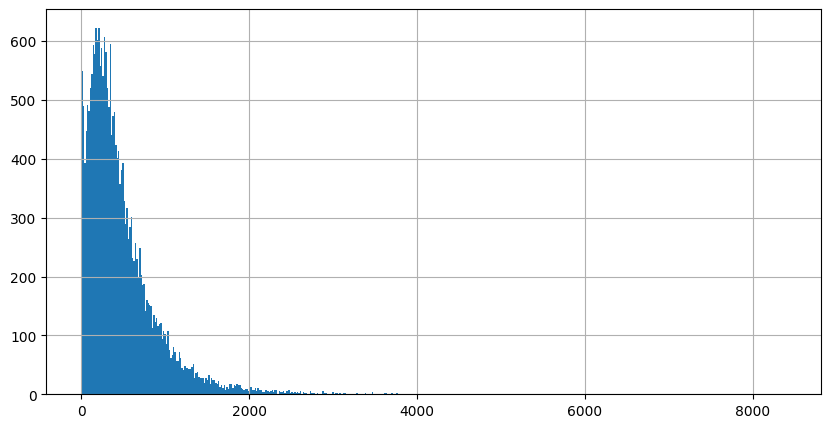

In [6]:
df_para = pd.read_parquet("../data/processed/20240127_sotu/paragraph.parquet")

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
_ = df_para["paragraph_length"].hist(ax=ax1, bins=500)